<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

Загрузить датасет по url:


In [2]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

C:\Users\Administrator\Anaconda3\envs\netology\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Administrator\Anaconda3\envs\netology\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


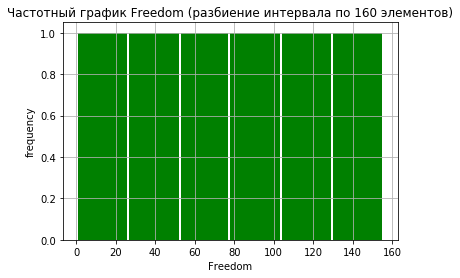

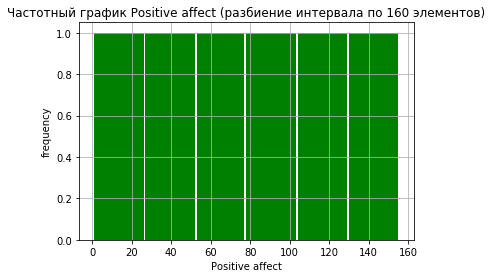

In [4]:
for col in ['Freedom','Positive affect']:
    parts = 160
    plt.hist(df[col], parts, facecolor='g')
    plt.ylabel('frequency')
    plt.xlabel(col)
    plt.title(f'Частотный график {col} (разбиение интервала по {parts} элементов)')
    plt.grid(True)
    plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [5]:
measure = df['Freedom']

In [6]:
print(f"Медиана: {statistics.median(measure)}")
print(f"Мода: {statistics.mode(measure)}")
print(f"Матожиданние (среднее): {statistics.mean(measure)}")
print(f"Стандартное отклонение: {statistics.pstdev(measure)}")
print(f"Дисперсия: {statistics.pvariance(measure)}")
print(f"Минимум: {min(measure)}")
print(f"Максимум: {max(measure)}")
print(f"Размах: {max(measure)-min(measure)}")

Медиана: 71.0
Мода: 5.0
Матожиданние (среднее): nan
Стандартное отклонение: nan
Дисперсия: nan
Минимум: 1.0
Максимум: 155.0
Размах: 154.0


Почему нельзя найти моду?

В колонке **Freedom** находятся пустые значения. Мы можем отфильтровать пустые значения и рассчитать показатели заново

In [7]:
print(f"Количество пустых значений в колонке: {measure.isnull().sum()}")

Количество пустых значений в колонке: 1


In [8]:
measure_ = measure[~np.isnan(measure)]
print(f"Медиана: {statistics.median(measure_)}")
print(f"Мода: {statistics.mode(measure_)}")
print(f"Матожиданние (среднее): {statistics.mean(measure_)}")
print(f"Стандартное отклонение: {statistics.pstdev(measure_)}")
print(f"Дисперсия: {statistics.pvariance(measure_)}")
print(f"Минимум: {min(measure_)}")
print(f"Максимум: {max(measure_)}")
print(f"Размах: {max(measure_)-min(measure_)}")

Медиана: 78.0
Мода: 5.0
Матожиданние (среднее): 78.0
Стандартное отклонение: 44.74371464239419
Дисперсия: 2002.0
Минимум: 1.0
Максимум: 155.0
Размах: 154.0


**Выбросы**

В изучаемой колонке выбросов нет. Это обусловлено спецификой данных - рейтинг от 1 до n. Все значения присутсвуют только 1 раз

Если необходимо, то мы могли бы применить фильтр по отклонению (например, не больше +-2 отклонения) или персентилям (например, 5 и 95 персентили)

In [9]:
#пример фильтра по персентилям
measure_for_filter_name = 'Log of GDP\nper capita'
measure_for_filter = df[measure_for_filter_name]

low_precentile = np.percentile(measure_,5)
high_precentile = np.percentile(measure_,95)
df_filtered = df[(df[measure_for_filter_name]>low_precentile) & (df[measure_for_filter_name]<high_precentile)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         139 non-null    object 
 1   Ladder                   139 non-null    int64  
 2   SD of Ladder             139 non-null    int64  
 3   Positive affect          139 non-null    float64
 4   Negative affect          139 non-null    float64
 5   Social support           139 non-null    float64
 6   Freedom                  139 non-null    float64
 7   Corruption               134 non-null    float64
 8   Generosity               139 non-null    float64
 9   Log of GDP
per capita    139 non-null    float64
 10  Healthy life
expectancy  135 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.0+ KB


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

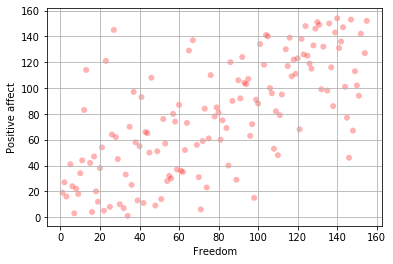

In [10]:
df_copy = df.dropna()

x=df_copy['Freedom']
y=df_copy['Positive affect']
plt.scatter(x, y, c='red', alpha=0.3, edgecolors='none')
plt.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.show()

In [11]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(x, y)
print(f'Коэффициент корреляции Пирсона: {corr}')

Коэффициент корреляции Пирсона: 0.696567045809068


**Вывод:** Вероятно, есть заметная положительная зависимость между значениями Freedom и Positive affect

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [12]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

df_copy = df.dropna()
freedom_base=df_copy['Freedom']

freedom_normalized = min_max_scaler.fit_transform(np.array(freedom_base).reshape(-1, 1))
print(min(freedom_normalized))
print(np.mean(freedom_normalized))
print(max(freedom_normalized))

[-1.]
0.010760667903525244
[1.]


Построить матрицу корреляций для всех колонок таблицы

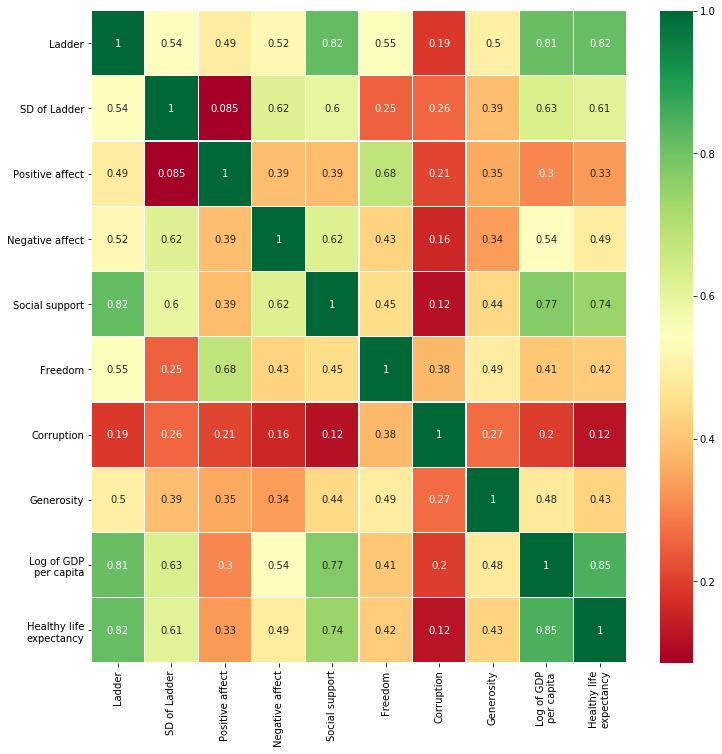

In [13]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [14]:
df_avocado=pd.read_csv('data/avocado.csv')
df_avocado[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

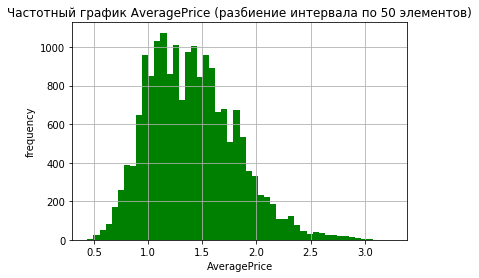

In [15]:
n, bins, patches = plt.hist(df_avocado['AveragePrice'], 50, facecolor='g')

plt.ylabel('frequency')
plt.xlabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

**Вывод:** Распределение похоже на нормальное, но смущает немного срезанный сегмент слева. Возможно это связано с качеством выборки/данных

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [16]:
df_avo_copy = df_avocado.dropna()

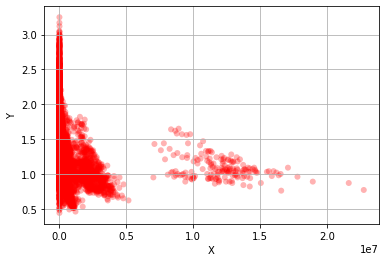

-0.20831704848788474


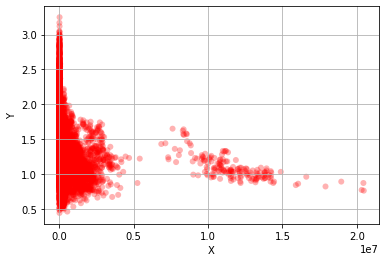

-0.17292777250933558


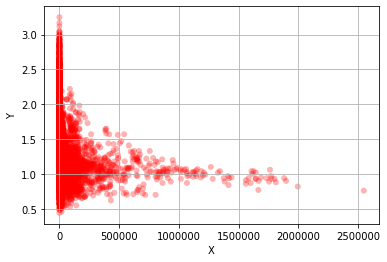

-0.1794459839797573


In [17]:
#Вариант 1. Считаем корелляцию для каждой пары значений, выводим график
def check_correlation(x,y):
    plt.scatter(x, y, c='red', alpha=0.3, edgecolors='none')
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    corr, p_value = pearsonr(x, y)
    return corr, p_value

corr_4046_v_AveragePrice, _ = check_correlation(df_avo_copy['4046'],df_avo_copy['AveragePrice'])
print(corr_4046_v_AveragePrice)


corr_4225_v_AveragePrice, _ = check_correlation(df_avo_copy['4225'],df_avo_copy['AveragePrice'])
print(corr_4225_v_AveragePrice)


corr_4770_v_AveragePrice, _ = check_correlation(df_avo_copy['4770'],df_avo_copy['AveragePrice'])
print(corr_4770_v_AveragePrice)


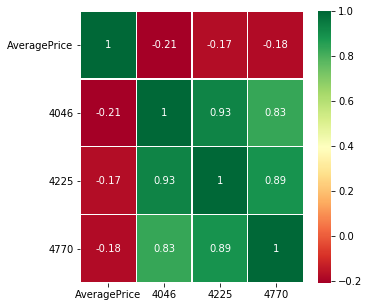

In [18]:
#Вариант 2. Строим heatmap для заданных столбцов в dataframe
sns.heatmap(df_avo_copy[['AveragePrice','4046','4225','4770']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(5,5)
plt.show()

**Вывод:** Заданные колонки (4046, 4225, 4770) имеют слабую обратную связи с колонкой AveragePrice